In [12]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,accuracy_score,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score

In [13]:

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
data = pd.read_csv('/content/creditcard (5).csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Exploratory Data Analysis**

In [16]:
#Reading dataset
df = pd.read_csv( r'/content/creditcard (5).csv')

In [17]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
#Total number of rows and columns
df.shape

(284807, 31)

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [22]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


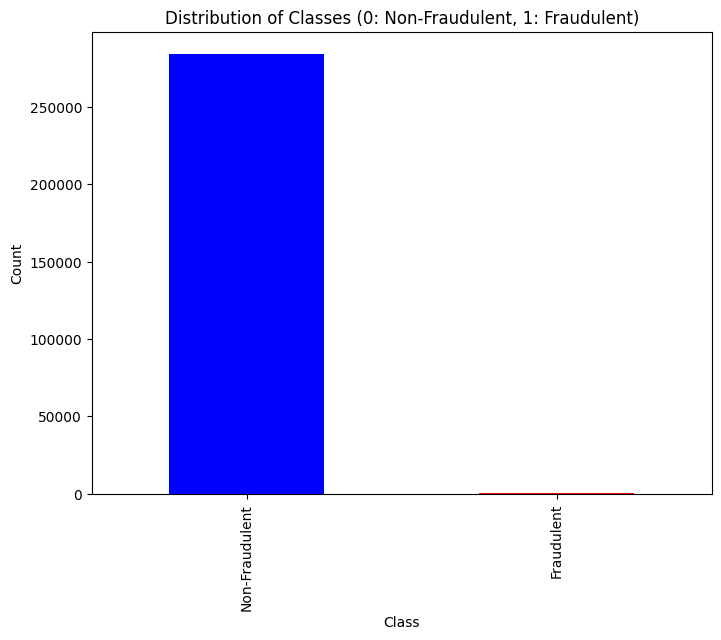

In [24]:
# Visualize the distribution of 'Class' (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Classes (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Fraudulent','Fraudulent'])
plt.show()

Only 492 (or 0.172%) of transaction are fraud cases.It shows the data is highly unbalanced.

Text(0.5, 1.0, 'Distribution of Amount')

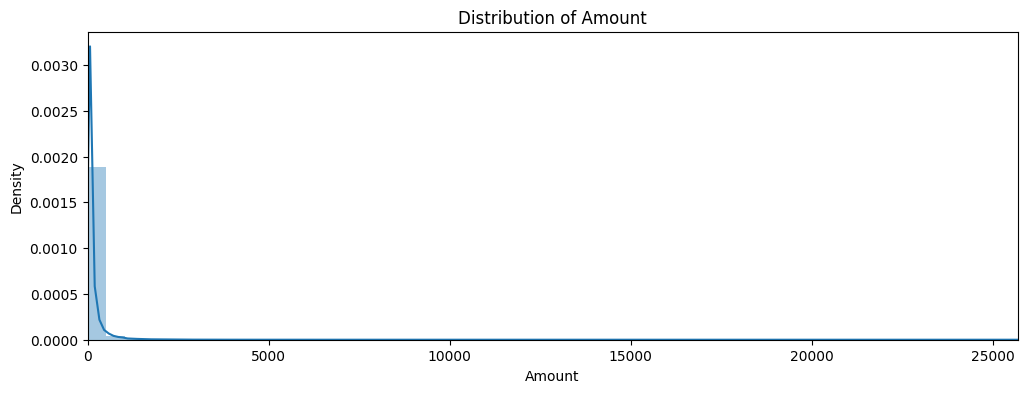

In [25]:
amount_val = df['Amount'].values
plt.figure(figsize = (12,4))
sns.distplot(df['Amount'])
plt.xlim(min(amount_val),max(amount_val))
plt.title("Distribution of Amount")

In [26]:
#Deleting duplicate columns
df = df.drop_duplicates()
df.count()

Time      283726
V1        283726
V2        283726
V3        283726
V4        283726
V5        283726
V6        283726
V7        283726
V8        283726
V9        283726
V10       283726
V11       283726
V12       283726
V13       283726
V14       283726
V15       283726
V16       283726
V17       283726
V18       283726
V19       283726
V20       283726
V21       283726
V22       283726
V23       283726
V24       283726
V25       283726
V26       283726
V27       283726
V28       283726
Amount    283726
Class     283726
dtype: int64

** Getting the correct datatype for the dates**

While working with data in Pandas, it is not an unusual thing to encounter time series data. We cannot perform any time series-based operation on the dates if they are not in the right format. To be able to work with it, we are required to convert the dates into the correct format.

In [27]:
timedelta = pd.to_timedelta(df['Time'],unit='s')

df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amounts by hours of Frauds and Normal Transactions')

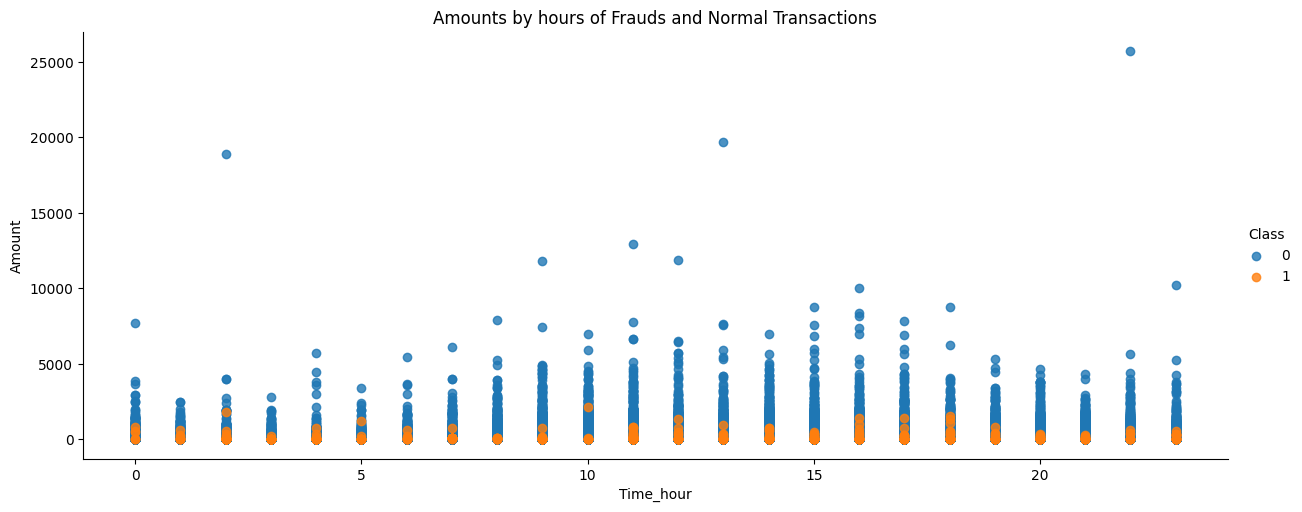

In [28]:
#amount vs time distribution
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=df,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)

Above graph pattern shows us about non-fraud and fraud transactions.

**VISUALIZATION BY USING DIFFERENT PLOTS:**

**Visualization using boxplot**

**Box Plots:** Box plots are a graphical representation of the distribution of a set of data. In a box plot, the median is shown by a line inside the box, while the center box depicts the range of the data. The whiskers extend from the box to the highest and lowest values in the data, excluding outliers. Box plots can help us to identify the spread and skewness of the data

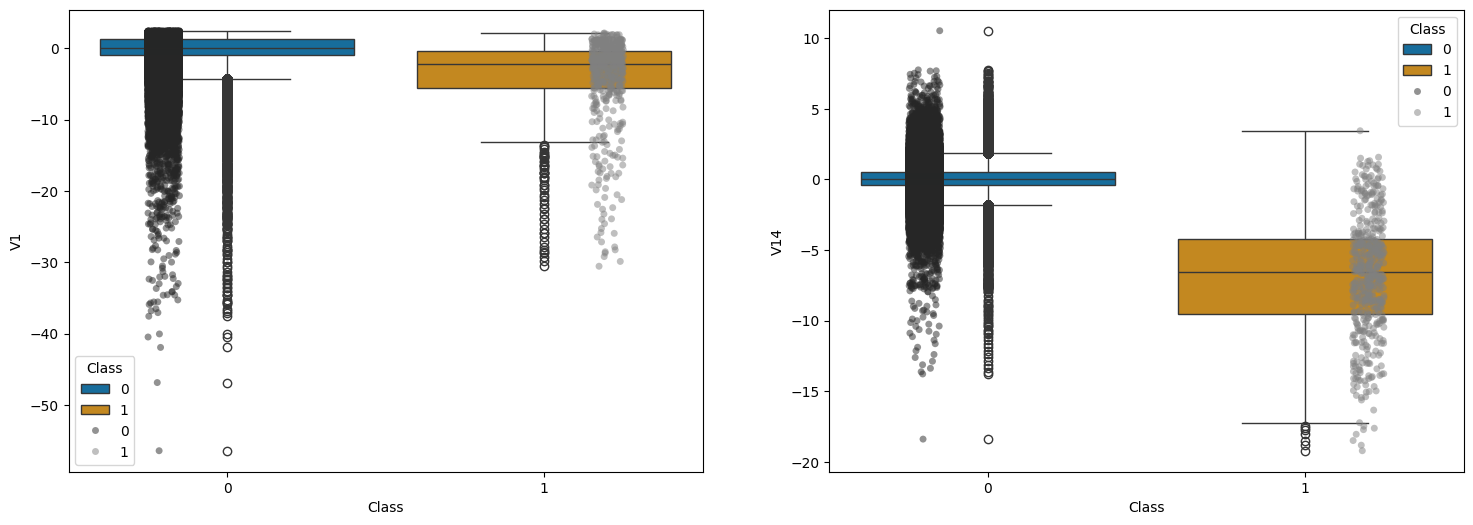

In [29]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=df, ax=axes[index])
    sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

<Axes: xlabel='Class', ylabel='Amount'>

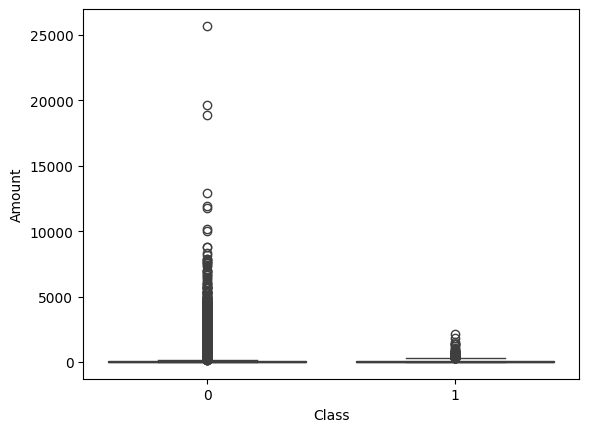

In [30]:
sns.boxplot(y="Amount", x="Class",data=df)

**Visualisation using Joint plot**

When we want to compare two variables distributions at a time in Python, we can use the joint plot function

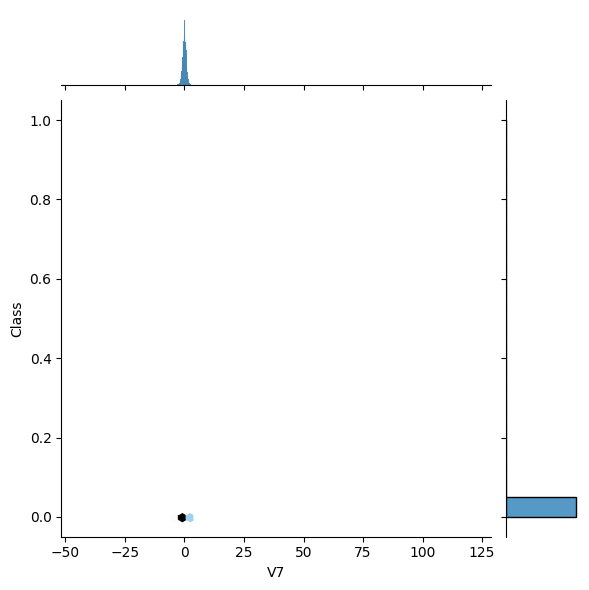

In [31]:
sns.jointplot(y='Class',x='V7',data=df,kind='hex')

**Visualisation using distribution plot**

Distribution plots are used to visualize univariate distributions of observations
It help to identify dataset is normal or not, where are potential gaps in your dataset.

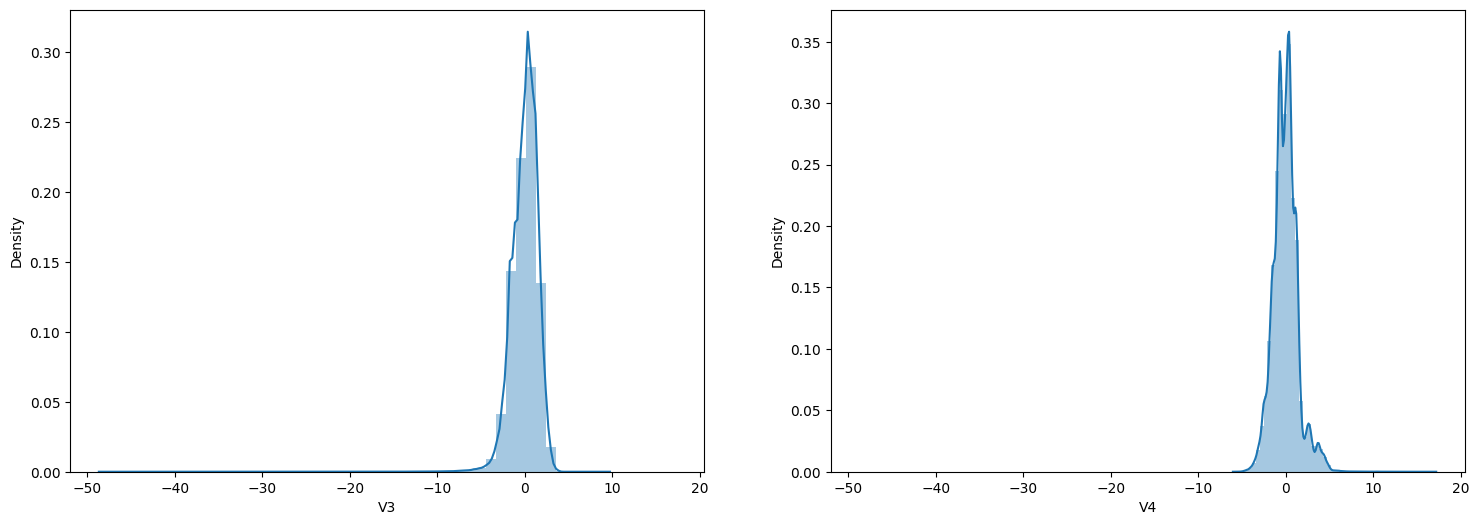

In [32]:
f, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
sns.distplot(df['V3'],ax=axes[0])
sns.distplot(df['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

**Visualisation using scatter plot**

**Scatter Plots:** A quick and efficient method of displaying the relationship between two variables is to use scatter plots. With one variable plotted on the x-axis and the other variable drawn on the y-axis, each data point in a scatter plot is represented by a point on the graph. We may use scatter plots to visualize data to find patterns, clusters, and outliers.

<Axes: xlabel='V9', ylabel='Class'>

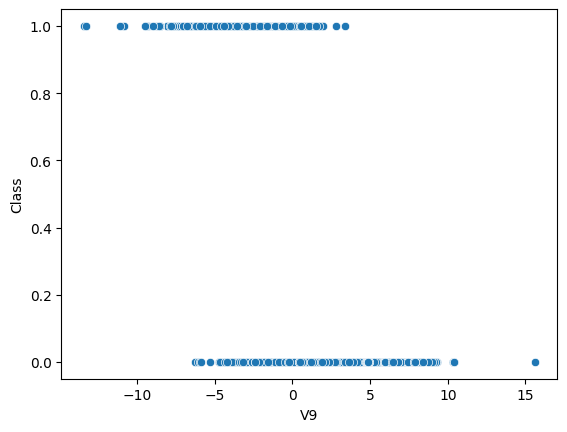

In [33]:
sns.scatterplot(x="V9", y="Class",data=df)

**Visualisation using pair plot**

Pair plots play same role as individual scatter plots play role when they provide a variety of visualizations.

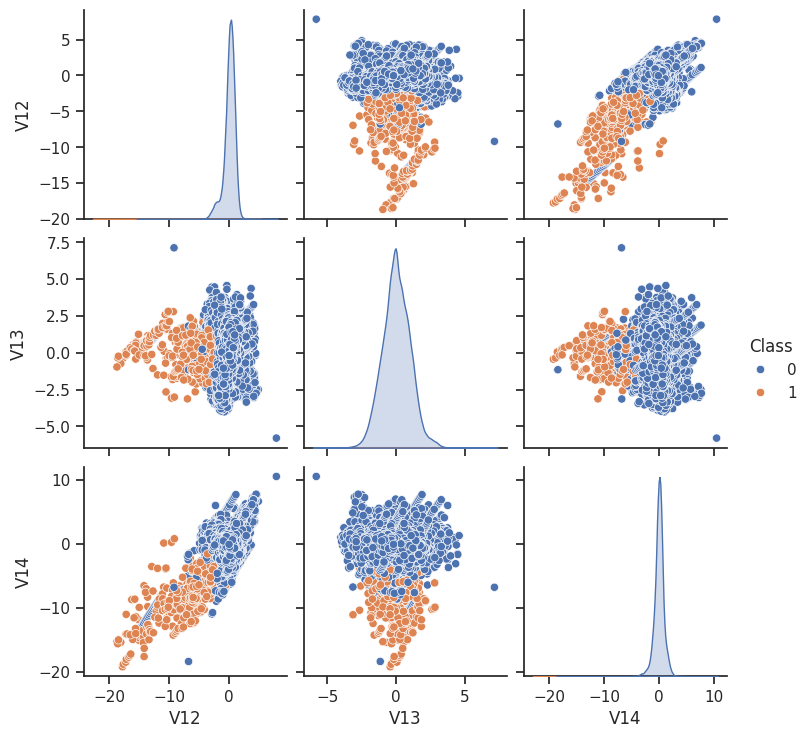

In [34]:
import pandas as pd
import seaborn as sns


sns.set(style="ticks")
sns.pairplot(df[["V12", "V13", "V14", "Class"]], hue="Class")


**Correlation matrix**

Given two variables, if the value of one variable is dependent on the value of the other variables, we say the variables are related. The measure of the relationship between two variables statistically is called "Correlation". Here the two variables dependent on each other are the price and Demand of a product. For a general example, whenever a product starts losing its Demand, the company decreases the price of the product because, with the price decrease, Demand rises.


 A correlation matrix is a common tool used to compare the coefficients of correlation between different features in a dataset. It allows us to visualize how much correlation exists between different variables. This is an important step in pre-processing machine learning pipelines. Since the correlation matrix allows us to identify variables that have high degrees of correlation, they allow us to reduce the number of features we may have in a dataset. This is often referred to as dimensionality reduction and can be used to improve the runtime and effectiveness of our models.





<Axes: >

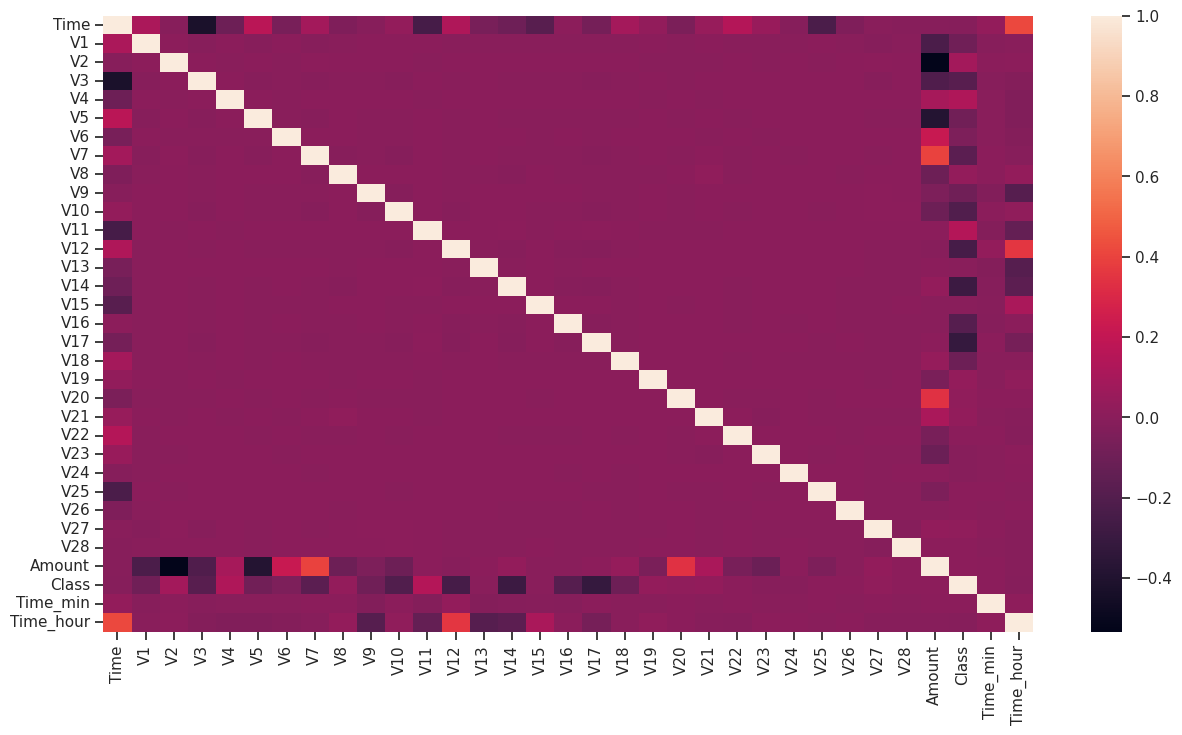

In [35]:
f, ax = plt.subplots(figsize=(15, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

**Data Cleaning**

Data Cleaning means it is better idea to scale the features before using the dataset so that all the values come in similar range. This is important so that features with lesser significance might not end up dominating the more significant features due to its larger range.

Different types of Scaling-Log, Standardization and Normalization is used. Which method is required to use is decide according by our dataset.

Log is a scaling technique which one use when the variables period several orders of magnitude.

Standardization is a scaling technique are the ones where the values are centered around the mean with a unit standard deviation.the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Normalization (Min-Max Scaling) is a scaling technique in which values are shifted and are then rescaled so that they end up ranging between 0 and 1.

In [36]:

#Scale amount by Standardization
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

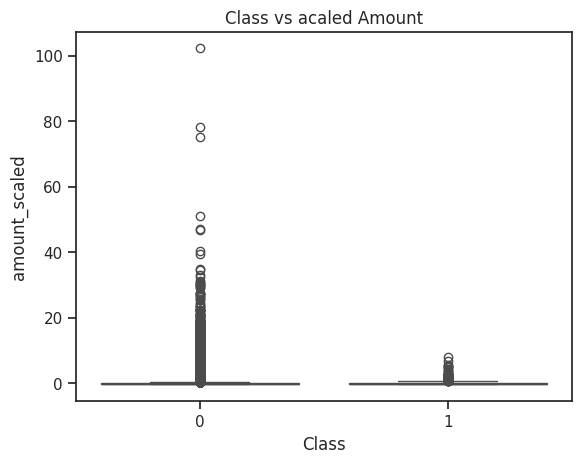

In [37]:
sns.boxplot(x ="Class",y="amount_scaled",data=df)
plt.title("Class vs acaled Amount")
plt.show()

## **Train and split the Data**\

follow We will be dividing the dataset into two main groups. One for training the model and the other for testing performance of trained model.

In [38]:
# Prepare features and target
# Using Scikit-learn to split data into training and testing sets

X = df.drop(['Time','Class'], axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2,stratify=df['Class'])
print(X_train.shape,X_test.shape)

(226980, 32) (56746, 32)


In [39]:
#Finding whether the 2 sets are classified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


**Handle Imbalanced Dataset**

Our dataset is an imbalanced dataset, as which connot proceed in machine learning. it will lead poor machine learning model,
we should handle the imbalanced dataset on priority.

 SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.sampling to the minority class by filling out the gap between each value and then do under-sampling for the majority class so it meets in the middle.

In [40]:
#Apply SMOTE to create synthetic observations from minority class

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

from imblearn.over_sampling import SMOTE #Over sampling
smote= SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X, y)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (226980, 32)
y_train:  (226980,)
X_test:  (56746, 32)
y_test:  (56746,)


............


X_train_smote:  (566506, 32)
y_train_smote:  (566506,)
X_test_smote:  (56746, 32)
y_test_smote:  (56746,)


**Feature Engineering**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier (class_weight='balanced', random_state=123)
rf.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', random_state=123)

In [42]:
importances = rf.feature_importances_
sorted(importances)

[0.0030345206256817024,
 0.0033623207654511445,
 0.004634414427851169,
 0.005034927106419983,
 0.005377837676284502,
 0.005498746522344139,
 0.0060588963255692255,
 0.006408821949830307,
 0.007177208828154231,
 0.007239316294685678,
 0.007600580102884583,
 0.00798557636180823,
 0.008082668499339592,
 0.00896682811732781,
 0.00912862555830207,
 0.009149572995714506,
 0.00938056236923842,
 0.009570564729121413,
 0.01090879917867482,
 0.013552412126255915,
 0.013794879484676632,
 0.015054017770294675,
 0.015213021018942794,
 0.0353944826440059,
 0.03869801889967181,
 0.05054589232874765,
 0.05665698837995595,
 0.0794439977282722,
 0.08795882591988963,
 0.1376335266133547,
 0.15464715125810136,
 0.16680599739314725]

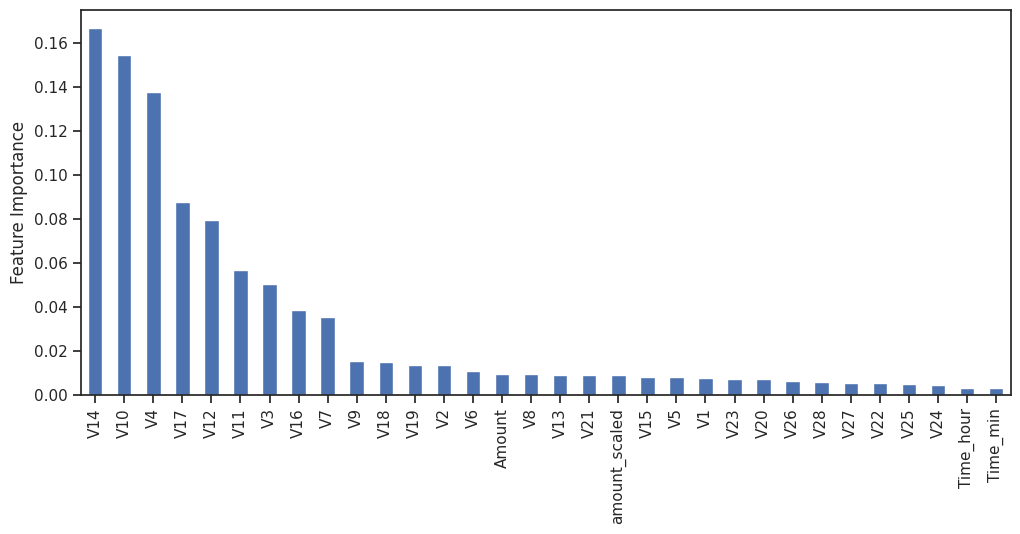

In [43]:
feature_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
plt.show()

**Model Selection and Model Training**

**Decision Tree Classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
pred_train_dt = dt.predict(X_train)
pred_dt = dt.predict(X_test)

In [47]:
matrix_dt = confusion_matrix(y_test, pred_dt)
matrix_dt

array([[56628,    23],
       [   24,    71]])

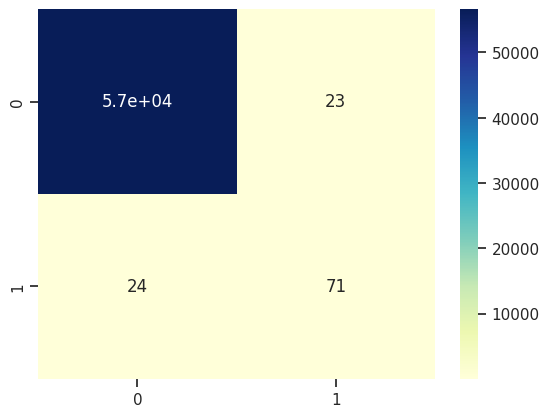

In [48]:

sns.heatmap(data=matrix_dt, annot=True , cmap="YlGnBu")
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline

In [50]:
def model_eval(y_test, predicted):

    accuracy = accuracy_score(y_test, predicted)*100
    precision = precision_score(y_test, predicted)*100
    recall = recall_score(y_test, predicted)*100
    f1 = f1_score(y_test, predicted) *100
    confusion_matrix =metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    auc = np.NaN
    if auc:
        auc = metrics.roc_auc_score(y_test, predicted )*100
        fpr, tpr, threshold = roc_curve(y_test, predicted)
        plt.plot(fpr, tpr, label='Model', c='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', c='yellow')
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    print('Accuracy:',accuracy  )
    print('Precision:', precision )
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)
    print('Classification Report:',classification_report)

    return [recall, precision, f1, auc]

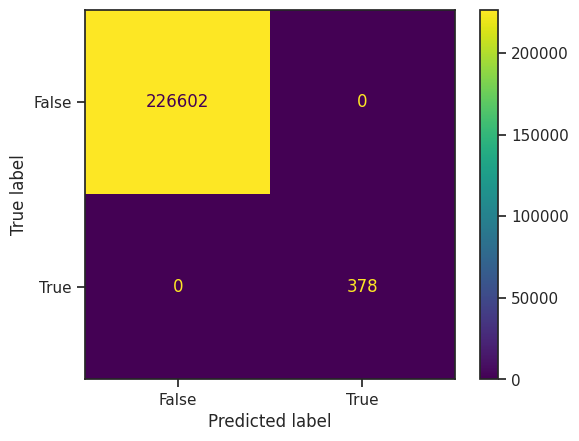

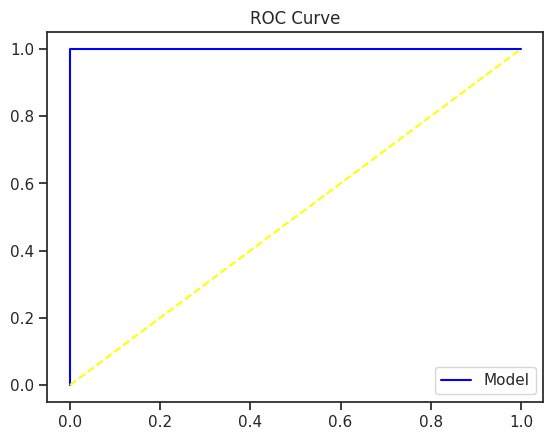

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0
AUC: 100.0
Classification Report: <function classification_report at 0x783363006680>


[100.0, 100.0, 100.0, 100.0]

In [51]:
model_eval(y_train, pred_train_dt)

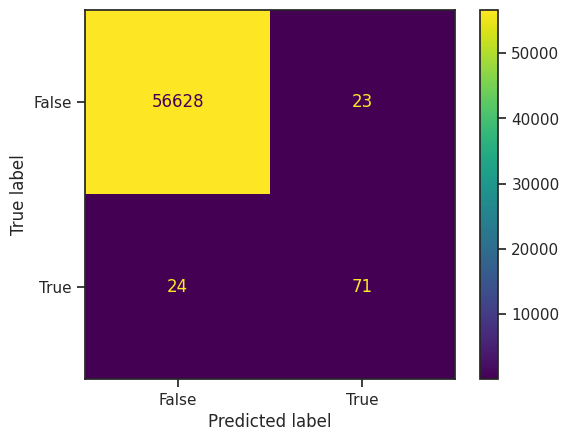

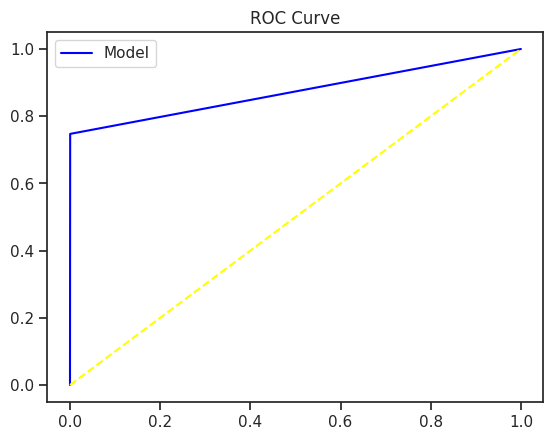

Accuracy: 99.91717477883904
Precision: 75.53191489361703
Recall: 74.73684210526315
F1 Score: 75.13227513227513
AUC: 87.34812132270625
Classification Report: <function classification_report at 0x783363006680>


[74.73684210526315, 75.53191489361703, 75.13227513227513, 87.34812132270625]

In [52]:
model_eval(y_test, pred_dt)

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
   'min_samples_split' : [10,20,30,40,50,60]
}
grid_search_dt = GridSearchCV(estimator = dt,
                             param_grid = parameters,
                             scoring = 'accuracy',
                             cv = 10,
                             n_jobs = -1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_
best_parameters

{'max_depth': 5, 'min_samples_split': 10}

In [55]:
pred_gstrain_dt =grid_search_dt.predict(X_train)
pred_gstest_dt = grid_search_dt.predict(X_test)

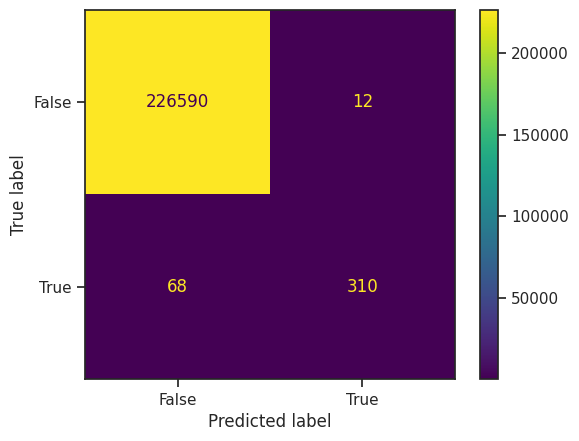

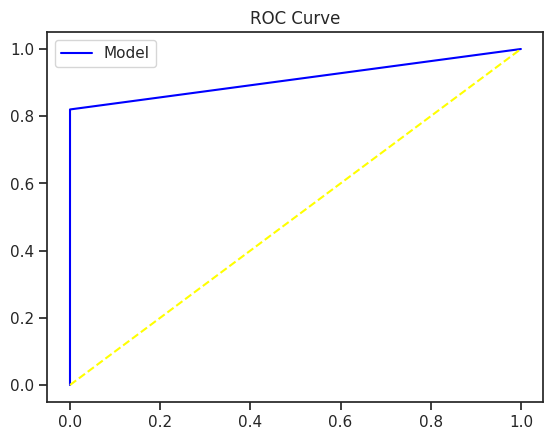

Accuracy: 99.96475460392986
Precision: 96.27329192546584
Recall: 82.01058201058201
F1 Score: 88.57142857142857
AUC: 91.00264319106164
Classification Report: <function classification_report at 0x783363006680>


[82.01058201058201, 96.27329192546584, 88.57142857142857, 91.00264319106164]

In [56]:
model_eval(y_train, pred_gstrain_dt)

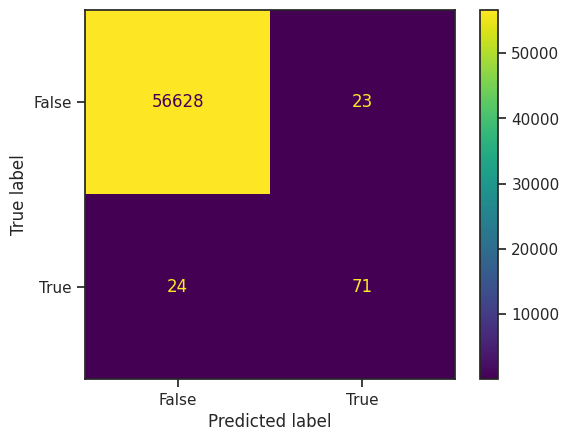

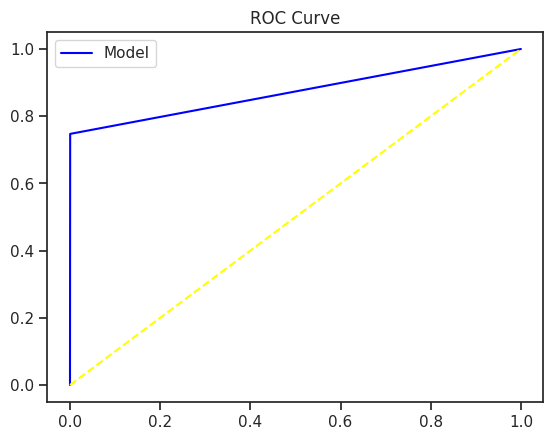

Accuracy: 99.91717477883904
Precision: 75.53191489361703
Recall: 74.73684210526315
F1 Score: 75.13227513227513
AUC: 87.34812132270625
Classification Report: <function classification_report at 0x783363006680>


[74.73684210526315, 75.53191489361703, 75.13227513227513, 87.34812132270625]

In [59]:
model_eval(y_test, pred_dt)

In [62]:
matrix_gs_dt = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_dt

array([[56643,     8],
       [   22,    73]])

**Model Evaluation**

we will evaluate model using:

ROC AUC Score

ROC Curve

Confusion Matrix

Classification report

In [63]:

from sklearn.metrics import roc_auc_score

print('Decision Tree Classifier: ', roc_auc_score(y_test, pred_dt))
print('Decision Tree Classifier_GridSearch_CV: ', roc_auc_score(y_test, pred_gstest_dt))

Decision Tree Classifier:  0.8734812132270625
Decision Tree Classifier_GridSearch_CV:  0.8841399185595274


In [64]:

#Evaluating using ROC Curve
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pred_dt)
dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_threshold = roc_curve(y_test, pred_gstest_dt)

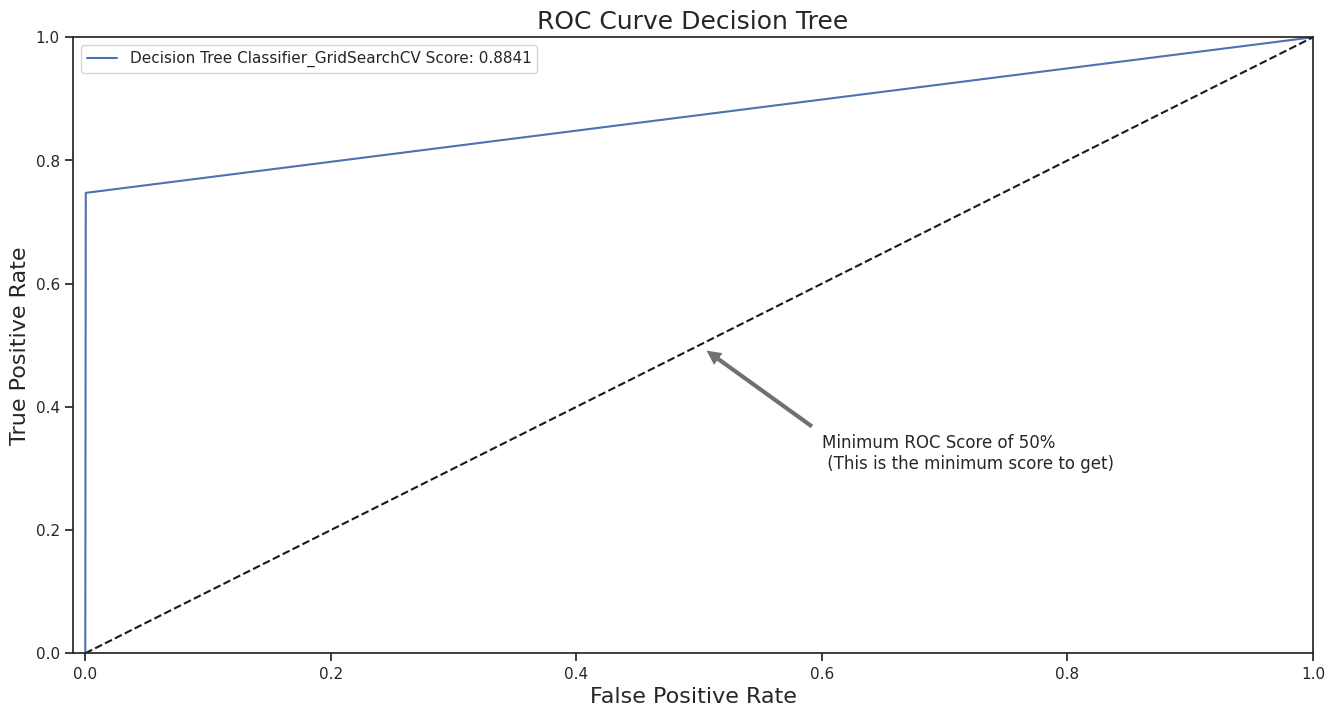

In [65]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve Decision Tree', fontsize=18)

plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_dt)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

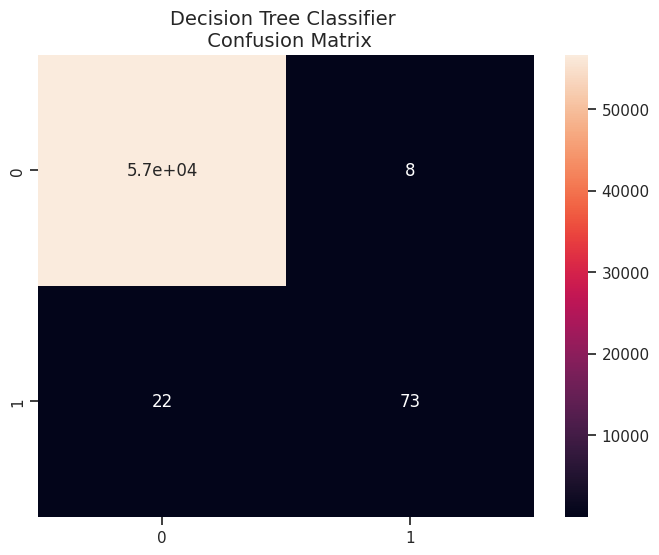

In [66]:
#Confusion Matrix

fig = plt.figure(figsize=(8,6))


sns.heatmap(matrix_gs_dt,  annot=True)
plt.title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
plt.show()

In [70]:
#Evaluation using classification report

def model_class_rep(actual, predicted):
        acc_score = accuracy_score(actual, predicted)
        conf_matrix = confusion_matrix(actual, predicted)
        clas_rep = classification_report(actual, predicted)

        print('Model Accuracy is: ', acc_score)
        print(conf_matrix)
        print(clas_rep)

In [68]:
results = model_class_rep(y_test, pred_gstest_dt)

Model Accuracy is:  0.9994713283755683
[[56643     8]
 [   22    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [71]:
#Evaluating using Accuracy
acc_score = accuracy_score(y_test, pred_gstest_dt)
print('Decision Tree Classifier Accuracy : ',round(acc_score * 100,2).astype(str) + '%')

Decision Tree Classifier Accuracy :  99.95%


Decision Tree Classifier gives a better accuracy score of 99.95% with 100% precision,100% recall and 100% f1 score

**Conclusion**


Exploratory Data analysis is done for different features.

Prepared Data and build Decision Tree ML Models.

Evaluated model performance with respect to Accuracy,Precision,Recall and F1 Scores.

also we can conclude Decision Tree Model is the best Model for finding frauds in Credit Card with an Accuracy of 99.95% ,100% precision and 100% AUC score.